In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# funksjon for kinetisk energi
def kineticEnergy(mass, velocity):
 
    KineticEnergy = 0.5 * mass * velocity * velocity  # Formelen for kinetisk energi
 
    return KineticEnergy
 
# funskjon til å regne ut potensial energi
def potentialEnergy(mass, g , height):
 
    PotentialEnergy = mass * g * height               # Formelen for potensial energi
 
    return PotentialEnergy

# funksjonen for rotasjonsenergi av et tom ball
def rotationalEnergy(mass, velocity):
 

    rotationalEnergy = (1/3) * mass * velocity ** 4  # Formelen for kinetisk energi
 
    return rotationalEnergy

In [3]:
# additional function to calculate speed using pandas library
def calculate_speeds(positionsOverTime):
    t = 't'
    movementsOverTimesteps = (np.roll(positionsOverTime, -1, axis=0) - positionsOverTime)[:-1]
    speeds = np.sqrt( movementsOverTimesteps.x ** 2 + movementsOverTimesteps.y ** 2 ) / movementsOverTimesteps[t]
    
    return pd.DataFrame({t: positionsOverTime[t][:-1], 'Speed': speeds})

In [4]:
# Leser av filen og plaserer data i riktig posisjon
data = pd.read_csv("data.csv")

xPosition = data.x   # Henter verdiene av posisjonene langs x-aksen
x_0 = data.x.iloc[0] # første verdi x

yPosition = data.y   # Henter verdiene av posisjonene langs y-aksen
y_0 = data.y.iloc[0] # første verdi y

time = data.t        # henter tidspunktene
t_0 = data.t.iloc[0] # første verdi t

In [5]:
df = data.rename(columns={'t': 'Time[s]', 'x': 'x-rettning [m]', 'y': 'y-rettning [m]'})
print(df)

     Time[s]  x-rettning [m]  y-rettning [m]
0   0.000000        0.001206        0.134715
1   0.033589        0.009626        0.134639
2   0.067178        0.013836        0.134602
3   0.100767        0.019120        0.134189
4   0.134356        0.024819        0.133674
..       ...             ...             ...
56  1.881089        1.016426        0.067442
57  1.914678        1.046406        0.065225
58  1.948267        1.075952        0.063565
59  1.981856        1.107696        0.060729
60  2.015444        1.140650        0.059311

[61 rows x 3 columns]


In [6]:
# inital verdiene
mass = 0.006 # [kg]
height = y_0 # [m]
lenght = 1.2 # [m]
g = 9.81     # [m/s^2]
PE_0 = potentialEnergy(mass, g, height) # potensial energi i starten = den totale energien

Text(0, 0.5, 'Lengde [m]')

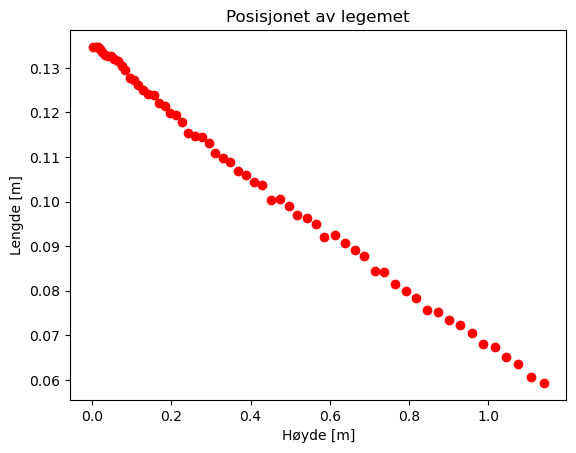

In [30]:


# plotter posisjonene
plt.plot(xPosition, yPosition, 'ro')
plt.title("Posisjonet av legemet")
plt.xlabel("Høyde [m]")
plt.ylabel("Lengde [m]")

In [14]:
# initalize lists 
velocity = []
xVelocity = []
yVelocity = []

KineticE = []
PotentialE = []
rotationalE = []
TotalE = []

EnergyError = []

# Beregner hastigheten 
for i in range(1, len(time)):
    # Endring
    temp_dt = time[i]-time[i-1]
    temp_dx = xPosition[i]-xPosition[i-1]
    temp_dy = yPosition[i]-yPosition[i-1]
    
    temp_velocity = math.sqrt((temp_dx/temp_dt)**2 + (temp_dy/temp_dt)**2)
    
    # energi
    KE = kineticEnergy(mass, speeds.Speed[i - 1])
    PE = potentialEnergy(mass, g, yPosition[i - 1])
    KE_rot = rotationalEnergy(mass, speeds.Speed[i - 1])
    
    TOTE = KE + PE + KE_rot 
    
    ERR = PE_0 - TOTE
    
    # Legger til listene
    # legger til hastighet
    xVelocity.append(temp_dx/temp_dt)
    yVelocity.append(temp_dy/temp_dt)
    velocity.append(temp_velocity)
    
    # Legger til energi
    KineticE.append(KE)
    PotentialE.append(PE)
    rotationalE.append(KE_rot)
    TotalE.append(TOTE)
    
    EnergyError.append(abs(ERR))

time = time[:-1]

Over kalkulerer jeg hastighet i både x- og y-rettning. Jeg bruker numerisk derivasjon for å gjennomfører dette. Numerisk integrasjon handler om å ta en liten edring i strekning og dele den på endring i tiden. Det betyr at dersom vi har endring over strekning i ,for eksempel, x-aksen dx vi kan dele på eneringen i tiden dt og vi får gjennomsnitlige endringen. Vi har brukt "tracker" som ga oss punker punker for posisjonen av et ball i bevegelse. Vi har endring i posisjonen i mellom disse punktene og deler den på tiden den tok for hver punk. Dette gir et approksimasjon av den deriverte som er også approksimasjonen for hastighetene. Dette kan vi bruke til å regne den kinetiske- og romasjons-energiene som er plotten under.

In [15]:
speeds = calculate_speeds(data)
speeds['MySpeed'] = velocity
print(speeds)

           t     Speed   MySpeed
0   0.000000  0.250678  0.250678
1   0.033589  0.125339  0.125339
2   0.067178  0.157793  0.157793
3   0.100767  0.170373  0.170373
4   0.134356  0.201824  0.201824
5   0.167944  0.216326  0.216326
6   0.201533  0.237425  0.237425
7   0.235122  0.255925  0.255925
8   0.268711  0.292857  0.292857
9   0.302300  0.273070  0.273070
10  0.335889  0.279503  0.279503
11  0.369478  0.342453  0.342453
12  0.403067  0.334426  0.334426
13  0.436656  0.300149  0.300149
14  0.470244  0.340517  0.340517
15  0.503833  0.362511  0.362511
16  0.537422  0.443988  0.443988
17  0.571011  0.395222  0.395222
18  0.604600  0.444655  0.444655
19  0.638189  0.426375  0.426375
20  0.671778  0.450614  0.450614
21  0.705367  0.460631  0.460631
22  0.738956  0.446603  0.446603
23  0.772544  0.514116  0.514116
24  0.806133  0.499581  0.499581
25  0.839722  0.534676  0.534676
26  0.873311  0.463302  0.463302
27  0.906900  0.623400  0.623400
28  0.940489  0.517637  0.517637
29  0.9740

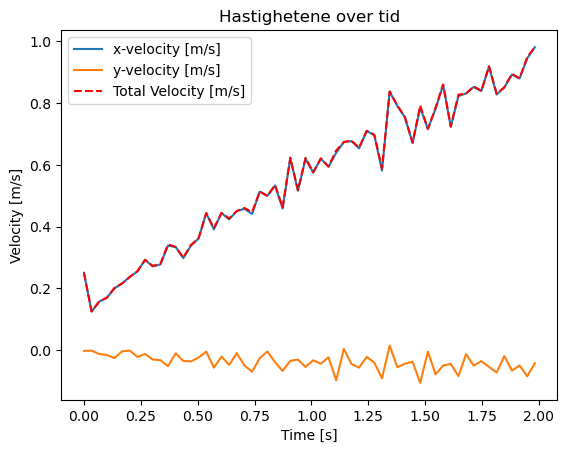

In [29]:
# plotter hastighet over tid
plt.plot(time, xVelocity, label="x-velocity [m/s]")
plt.plot(time, yVelocity, label="y-velocity [m/s]")
plt.plot(time, velocity,'r--' , label="Total Velocity [m/s]")

plt.title("Hastighetene over tid")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend()

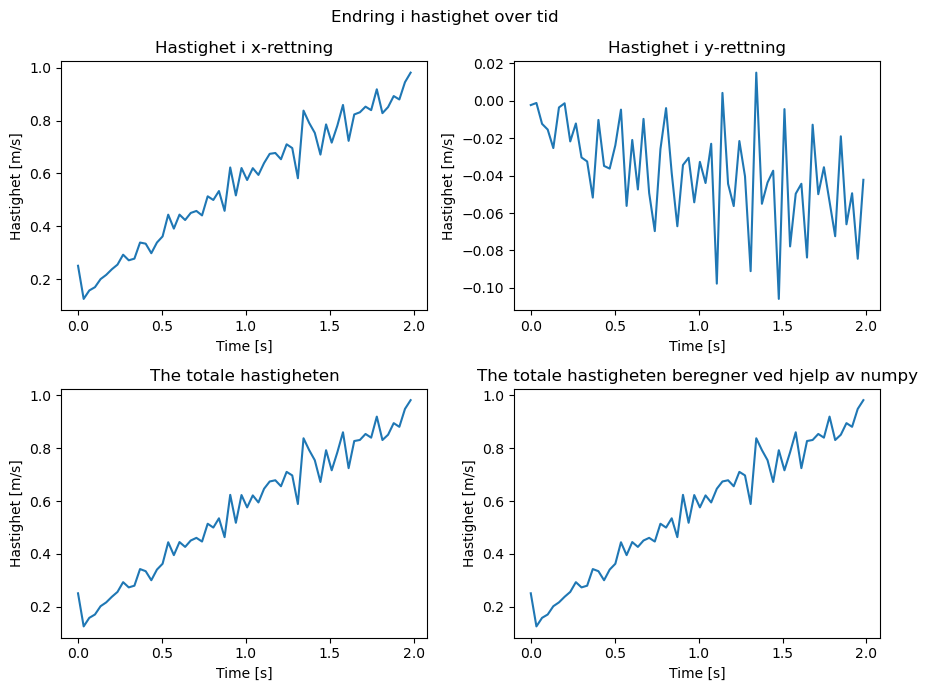

In [31]:
plt.rcdefaults() # decorative function

fig, axs = plt.subplots(2, 2, figsize=(9, 7), tight_layout=True)
fig.suptitle('Endring i hastighet over tid')

axs[0][0].set_title("Hastighet i x-rettning")
axs[0][0].set_xlabel("Time [s]")
axs[0][0].set_ylabel("Hastighet [m/s]")
axs[0][0].plot(time, xVelocity)

axs[0][1].set_title("Hastighet i y-rettning")
axs[0][1].set_xlabel("Time [s]")
axs[0][1].set_ylabel("Hastighet [m/s]")
axs[0][1].plot(time, yVelocity)

axs[1][0].set_title("The totale hastigheten")
axs[1][0].set_xlabel("Time [s]")
axs[1][0].set_ylabel("Hastighet [m/s]")
axs[1][0].plot(time, velocity)

axs[1][1].set_title("The totale hastigheten beregner ved hjelp av numpy")
axs[1][1].set_xlabel("Time [s]")
axs[1][1].set_ylabel("Hastighet [m/s]")
axs[1][1].plot(time, speeds.Speed)

Over kan vi se plotter av farten i x rettning (blått), y-rettining(orange) or total farten (grønt). Farten i x-rettning er ikke mulig å se og der er fordi, endringe i y-rettning er relativ lite som gjør at den titale farten går hovedsaklig i x-rettning. Grafene representerer ikke lineær endring i farten på grunn av feil som software "tracker" gjør under samling av data og avrunding som blir gjort av kompelatoren


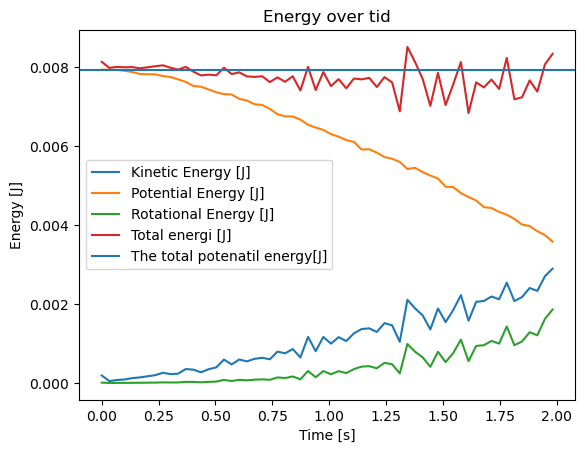

In [26]:


# plotter potensial og kinetisk energi 
plt.title("Energy over tid")

plt.plot(time, KineticE, label="Kinetic Energy [J]")
plt.plot(time, PotentialE, label="Potential Energy [J]")
plt.plot(time, rotationalE, label="Rotational Energy [J]")
plt.plot(time, TotalE, label="Total energi [J]")
plt.axhline(y=PE_0, label="The total potenatil energy[J]")

plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")

plt.legend()

Den potensiale energien synker gradvis som ballen beveger seg. Energien går fra potensielle til kinetiske og rotasjon. Det er tydelig vist på grafen siden rotasjons- og potensiel energi øker samtidig som den potensielle energien synker. 

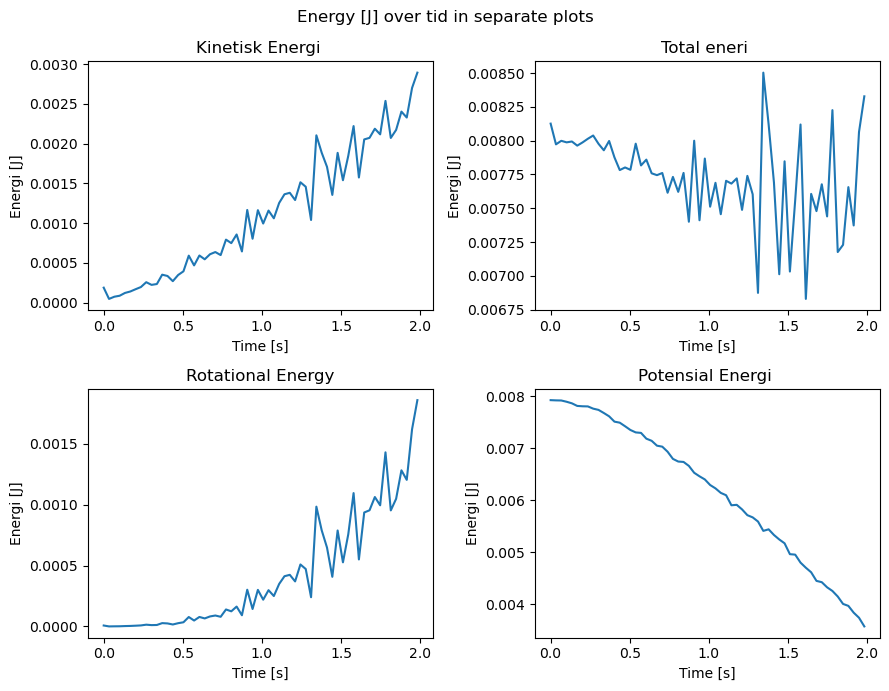

In [27]:
# Plotter potensial og kinetisk energi i separate subplotter
# Når er det mulig å se at kinetisk energi endrer seg
plt.rcdefaults() # decorative function

fig, axs = plt.subplots(2, 2, figsize=(9, 7), tight_layout=True)
fig.suptitle('Energy [J] over tid in separate plots')

# plotter kinetisk energi 
axs[0][0].set_title("Kinetisk Energi ")
axs[0][0].set_xlabel("Time [s]")
axs[0][0].set_ylabel("Energi [J]")
axs[0][0].plot(time, KineticE)

# plotter kinetisk energi 
axs[1][0].set_title("Rotational Energy")
axs[1][0].set_xlabel("Time [s]")
axs[1][0].set_ylabel("Energi [J]")
axs[1][0].plot(time, rotationalE)

# plotter potensial energi 
axs[1][1].set_title("Potensial Energi ")
axs[1][1].set_xlabel("Time [s]")
axs[1][1].set_ylabel("Energi [J]")
axs[1][1].plot(time, PotentialE)

# plotter potensial energi 
axs[0][1].set_title("Total eneri ")
axs[0][1].set_xlabel("Time [s]")
axs[0][1].set_ylabel("Energi [J]")
axs[0][1].plot(time, TotalE)

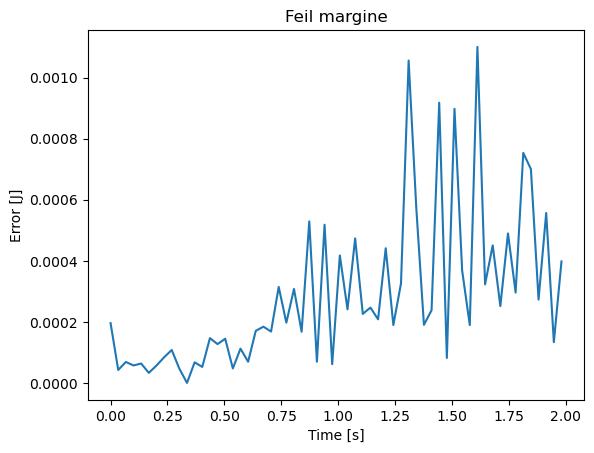

In [28]:


# Error marginen
plt.title("Feil margine")
plt.xlabel("Time [s]")
plt.ylabel("Error [J]")
plt.plot(time, EnergyError)